In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
df = pd.read_csv('./data/alzheimers_disease_data.csv')
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [34]:
df = df[['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis' ]] 
df

,Gender,AlcoholConsumption,PhysicalActivity,SleepQuality,FamilyHistoryAlzheimers,CholesterolTriglycerides,DietQuality,BMI,MemoryComplaints,Diagnosis
0,0,13.297218,6.327112,9.025679,0,162.189143,1.347214,22.927749,0,0
1,0,4.542524,7.619885,7.151293,0,294.630909,0.518767,26.827681,0,0
2,0,19.555085,7.844988,9.673574,1,83.638324,1.826335,17.795882,0,0
3,1,12.209266,8.428001,8.392554,0,277.577358,7.435604,33.800817,0,0
4,0,18.454356,6.310461,5.597238,0,291.198780,0.795498,20.716974,0,0
...,...,...,...,...,...,...,...,...,...,...
2144,0,1.561126,4.049964,7.535540,0,234.520123,6.555306,39.121757,0,1
2145,0,18.767261,1.360667,8.555256,0,367.986877,2.904662,17.857903,0,1
2146,0,4.594670,9.886002,5.769464,0,294.802338,8.120025,15.476479,0,1
2147,1,8.674505,6.354282,8.322874,0,145.253746,1.263427,15.299911,0,1


In [35]:
# RandomForest max_depth=7로, random_state=0 진행
from sklearn.model_selection import train_test_split

X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# RandomForest모델  max_depth=7로, random_state=0 진행
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_clf = RandomForestClassifier(
    n_estimators=101,
    max_depth=7,
    random_state=0
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f"학습점수: { rf_clf.score(X_train, y_train) }")
print(f"테스트 점수: { rf_clf.score(X_test, y_test) }")

print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

# RandomForest모델  max_depth=7로, random_state=0 진행

학습점수: 0.7635009310986964
테스트 점수: 0.6933085501858736

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       344
           1       0.65      0.33      0.44       194

    accuracy                           0.69       538
   macro avg       0.68      0.61      0.61       538
weighted avg       0.68      0.69      0.66       538



---------------------------------------

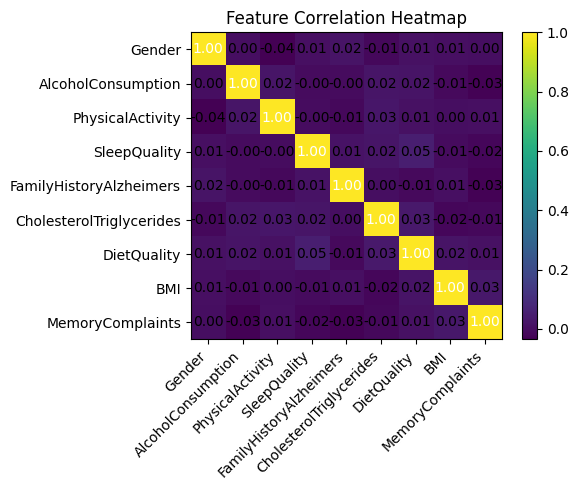

In [17]:
import matplotlib.pyplot as plt

# 1) 타겟(Diagnosis) 제거한 피처들만 추출
features = df.drop(columns=['Diagnosis'])

# 2) 피처 간 상관계수 계산
corr = features.corr()

# 3) 히트맵 그리기
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, aspect='auto')

# 4) 축 눈금 및 레이블 설정
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)


for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        val = corr.iloc[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha='center', va='center',
            color='white' if abs(val) > 0.5 else 'black'
        )

# 5) 컬러바 추가 및 레이아웃 조정
plt.colorbar(im, ax=ax)
ax.set_title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [18]:
# Voting테스트 진행
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

voting = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', GradientBoostingClassifier(random_state=0)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft', n_jobs=-1
)
voting.fit(X_train, y_train)
print("Voting 테스트 점수:", voting.score(X_test, y_test))


Voting 테스트 점수: 0.6895910780669146


In [38]:
# RandomForest max_depth 파라미터 8로 진행
from sklearn.model_selection import train_test_split

X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=101,
    max_depth=8,
    random_state=42
)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print(f"학습점수: { rf_clf.score(X_train, y_train) }")
print(f"테스트 점수: { rf_clf.score(X_test, y_test) }")
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))
# RandomForest max_depth 파라미터 8로 진행

학습점수: 0.7827436374922409
테스트 점수: 0.6988847583643123

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       342
           1       0.67      0.34      0.45       196

    accuracy                           0.70       538
   macro avg       0.69      0.62      0.62       538
weighted avg       0.69      0.70      0.67       538



In [39]:
# MemoryComplaints 빠진 버전
df_memoryx = df[['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality', 'BMI', 'Diagnosis' ]] 

from sklearn.model_selection import train_test_split

X = df_memoryx.drop(['Diagnosis'], axis=1)
y = df_memoryx['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=101,
    max_depth=8,
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f"학습점수: { rf_clf.score(X_train, y_train) }")
print(f"테스트 점수: { rf_clf.score(X_test, y_test) }")
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))
# MemoryComplaints 빠진 RandomForest 버전

학습점수: 0.7200496585971446
테스트 점수: 0.637546468401487

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       342
           1       0.67      0.01      0.02       196

    accuracy                           0.64       538
   macro avg       0.65      0.50      0.40       538
weighted avg       0.65      0.64      0.50       538



df9에 대해서 다음과 같은 결과를 얻었습니다.

상관관계 히트맵

MemoryComplaints(r≈0.31)와 BehavioralProblems(r≈0.22)가 Diagnosis와 비교적 강한 양(+)의 상관을 보입니다.

FunctionalAssessment(r≈–0.36), ADL(r≈–0.33), MMSE(r≈–0.24)는 Diagnosis와 부정적 상관관계가 크게 나타나, 기능·일상 수행 저하 및 인지 점수 하락이 알츠하이머 진단과 밀접합니다.

BMI, AlcoholConsumption, PhysicalActivity, DietQuality 등 라이프스타일 변수들은 |r|<0.05로 진단과의 직접적인 상관이 약합니다.

랜덤포레스트 중요 변수

FunctionalAssessment (≈0.26)

ADL (≈0.22)

MMSE (≈0.18)

MemoryComplaints (≈0.11)

BehavioralProblems (≈0.07)

이 다섯 가지가 df9에서 모델 성능에 가장 크게 기여한 변수들로, 주관적 평가 항목과 인지·일상 기능 지표가 핵심임을 확인할 수 있습니다.

한계점 및 주의사항

주관적 평가 편향: FunctionalAssessment, ADL, MemoryComplaints 등은 환자·보호자·의사의 주관이 개입될 수 있어 과적합 위험.

다중공선성: FunctionalAssessment와 ADL, MMSE 간 상관이 높으므로 회귀 모델링에서는 변수 선택 혹은 차원 축소 필요.

라이프스타일 변수의 미미한 기여: BMI·음주·운동·식단 같은 변수는 개별 영향이 크지 않으나, 이들을 결합한 복합 지표를 새로 만들어 보는 방법도 고려할 수 있습니다.

불균형·누락치: 클래스 분포와 결측치 처리 과정이 모델 결과에 편향을 줄 수 있으므로, SMOTE 등의 기법 및 추가 데이터 확보가 필요합니다.

------

In [23]:
# BMI와 Diagnosis의 상관계수 확인을 위한 작업

bins = [0, 18.5, 23, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese1', 'Obese2']
df['BMI_Group'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# 각 그룹별 상관관계 계산
group_corrs = {}

# 각 BMI 그룹별로 Diagnosis와의 상관관계 계산
for group, sub_df in df.groupby('BMI_Group'):
    try:
        numeric_df = sub_df.select_dtypes(include=[np.number])  # 수치형 변수만 선택
        corr_series = numeric_df.corr().loc['Diagnosis'].drop('Diagnosis')
        group_corrs[group] = corr_series
    except Exception as e:
        print(f"[{group}] 계산 불가: {e}")

# 결과 정리
group_corrs_df = pd.DataFrame(group_corrs).T
print("=== BMI Group별 Diagnosis 상관계수 ===")
print(group_corrs_df.round(3))

=== BMI Group별 Diagnosis 상관계수 ===
             Gender  AlcoholConsumption  PhysicalActivity  SleepQuality  \
Underweight  -0.072              -0.073             0.027        -0.025   
Normal        0.041              -0.010             0.036        -0.020   
Overweight   -0.034               0.101             0.076        -0.031   
Obese1       -0.002              -0.016            -0.035        -0.077   
Obese2       -0.034              -0.005            -0.009        -0.075   

             FamilyHistoryAlzheimers  CholesterolTriglycerides  DietQuality  \
Underweight                   -0.045                    -0.000        0.065   
Normal                        -0.083                     0.068        0.069   
Overweight                     0.044                     0.062        0.018   
Obese1                        -0.041                     0.048       -0.054   
Obese2                        -0.018                    -0.007       -0.008   

               BMI  MemoryComplaints  
U

C:\Users\Playdata\AppData\Local\Temp\ipykernel_11060\3655173503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_Group'] = pd.cut(df['BMI'], bins=bins, labels=labels)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_11060\3655173503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, sub_df in df.groupby('BMI_Group'):


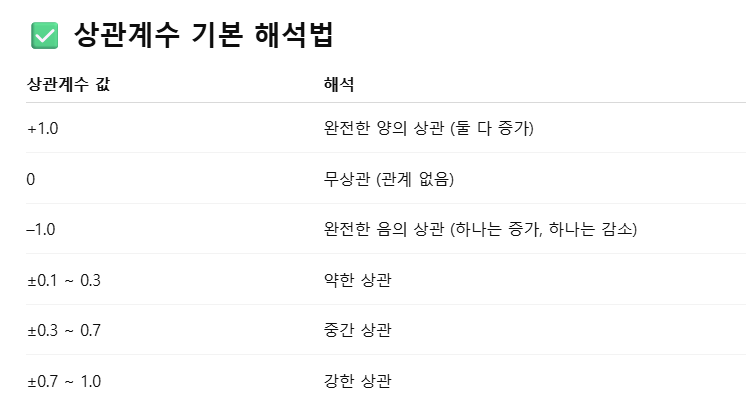